Name: Shen-Ching Feng

---

# Open Midterm 1

## FINM 36700 - 2025

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

# Instructions

## Please note the following:

Points
* For every minute late you submit the exam, you will lose one point.

Rules
* The exam is open-material, closed-communication.

Advice
* If you find any question to be unclear, state your interpretation and proceed. We will only answer questions of interpretation if there is a typo, error, etc.

## Data

**All data files are found in at the course web-book.**

https://markhendricks.github.io/finm-portfolio/. 

## Scoring

| Problem | Points |
|---------|--------|
| 1       | 70     |
| 2       | 30     |

**Numbered problems are worth 5pts unless specified otherwise.**

***

## Submitting your Exam

Your submitted file (ipynb or .zip) must be named in the format...
* `midterm-1-LASTNAME-FIRSTNAME.ipynb`
* `midterm-1-LASTNAME-FIRSTNAME.zip`

Submit the exam via
* Canvas at Assignments/Midterm 1
* If there is any trouble with Canvas, or for a backup, submit it at the course web-book
https://markhendricks.github.io/finm-portfolio/. 

Your submission must be complete.
* If we can't run the notebook to reproduce, it is not complete.

You should either...
* include all helper functions at the top of this notebook in the `Solution Functions` sections.
* submit a zipped folder containing the solution functions

__Exam Submission Structure:__

If you are submitting a zipped folder (because you cannot make the ipynb stand-alone) then use this structure...

```plaintext
exam-open-LASTNAME-FIRSTNAME.zip/
│── exam-open.ipynb
│── data/
│   ├── example_data.csv
│── modules/
│   ├── my_functions.py

***

## Your Functions

Please put all functions needed to run the ipynb here.

* We must be able to run the notebook!
* If you can't get all the functions into this ipynb, then make sure to zip your ipynb and supporting materials and submit the zipped folder.
* But most of you should be able to submit a single, stand-alone ipynb.

In [128]:
from module.utils import *
%config InlineBackend.figure_format = 'retina'

***

## Citations

### AI

List any AI tools used in the exam. No need to list prompts, but rather just AI models or IDE integrations.

I expect most students will have something to list here.



* 
* 
* 



### Other resources

Please list any other resources **aside from course materials** from which you used substantially. (No need to list every Google search; just materials from which you used substantially or for specific, original content.) 

I expect most students will not have anything to list here.

* 
* 
* 

***

# Your Name

List your name and CNetID

* Name: Shen-Ching Feng
* CNetID: scfengv / UChicago ID: 12498136

***

# 1. Portfolio Analysis

### Data

Use the data in `data/midterm_1_stock_returns.xlsx`.

The returns are...
* excess returns
* weekly
* through `May 2025`

It has returns for
* `25` single-name equities
* `SPY`

In [129]:
import pandas as pd

DATAFILE_STOCKS = 'data/midterm_1_stock_returns.xlsx'

SHEET = 'stock rets'
rets = pd.read_excel(DATAFILE_STOCKS, sheet_name=SHEET, index_col='date', parse_dates=['date'])

SHEET = 'benchmark rets'
spy = pd.read_excel(DATAFILE_STOCKS, sheet_name=SHEET, index_col='date', parse_dates=['date'])

display(rets.head())
display(spy.tail())

,ADSK,AOS,BKNG,CBRE,CCI,CF,CHRW,DE,DGX,DTE,...,MRK,MTD,PG,PNR,SBAC,STE,TTWO,VTRS,WM,WMT
date,,,,,,,,,,,,,,,,,,,,,
2015-01-09,-0.021166,-0.008927,-0.078893,-0.000577,0.026536,0.069378,-0.024107,-0.030450,-0.003635,-0.002414,...,0.093897,-0.008843,-0.002101,-0.023393,-0.001091,0.013659,-0.008009,-0.009050,-0.004251,0.040160
2015-01-16,-0.024369,-0.015313,-0.041579,-0.045022,0.012374,0.001515,0.019290,0.019265,0.019738,0.036405,...,0.007512,-0.024325,0.011081,-0.009830,-0.012042,-0.020590,0.048080,0.002865,0.013778,-0.028873
2015-01-23,0.023571,0.016282,0.029527,-0.004231,0.050829,0.013841,0.009121,0.012027,0.016490,0.014229,...,-0.008567,0.037842,-0.005804,-0.003565,0.080951,0.023033,0.022253,-0.031965,0.014548,0.020053
2015-01-30,-0.071920,0.069487,-0.027466,-0.018513,-0.003684,0.012031,-0.039124,-0.035766,0.002540,-0.017317,...,-0.035366,0.002970,-0.064277,-0.033041,-0.014190,-0.014506,-0.004689,-0.019552,-0.029622,-0.039883
2015-02-06,0.056754,0.037577,0.012818,0.048856,0.001733,-0.028619,-0.009970,0.044489,-0.020120,-0.049186,...,-0.024717,0.016318,0.015660,0.040609,0.010108,0.026985,-0.031460,0.013922,0.019639,0.027653


,SPY
date,
2025-04-25,0.046029
2025-05-02,0.029275
2025-05-09,-0.004270
2025-05-16,0.052911
2025-05-23,-0.025395


## 1 Performance Stats

#### 1.1. Calculate the Sharpe ratio for each stock during the sample period
* Recall: the sample period ranges from **February 2018 to December 2024 (inclusive)**.
* Report the top 5 stocks with the highest Sharpe ratios.

In [130]:
sample_18Feb_24Dec = rets.loc["2018-02-01":"2024-12-31"]
mean, std, sharpe = Calc_MeanStdSharpe_Stock(sample_18Feb_24Dec, annualized_factor = 52)
result1 = pd.DataFrame({
    "Mean": mean,
    "Std": std,
    "Sharpe": sharpe
})
result1.sort_values(by = "Sharpe", ascending = False)[:5]

,Mean,Std,Sharpe
WMT,0.173766,0.210244,0.826494
INTU,0.249579,0.322667,0.773487
WM,0.157506,0.206563,0.762506
PG,0.138219,0.187262,0.738104
GOOGL,0.212046,0.289855,0.731559


#### 1.2. Display the correlation matrix for the first ten stocks (columns) over the sample period.
* On average, are these stocks highly correlated? Explain.
* Which of these stocks offer the best diversification benefits?

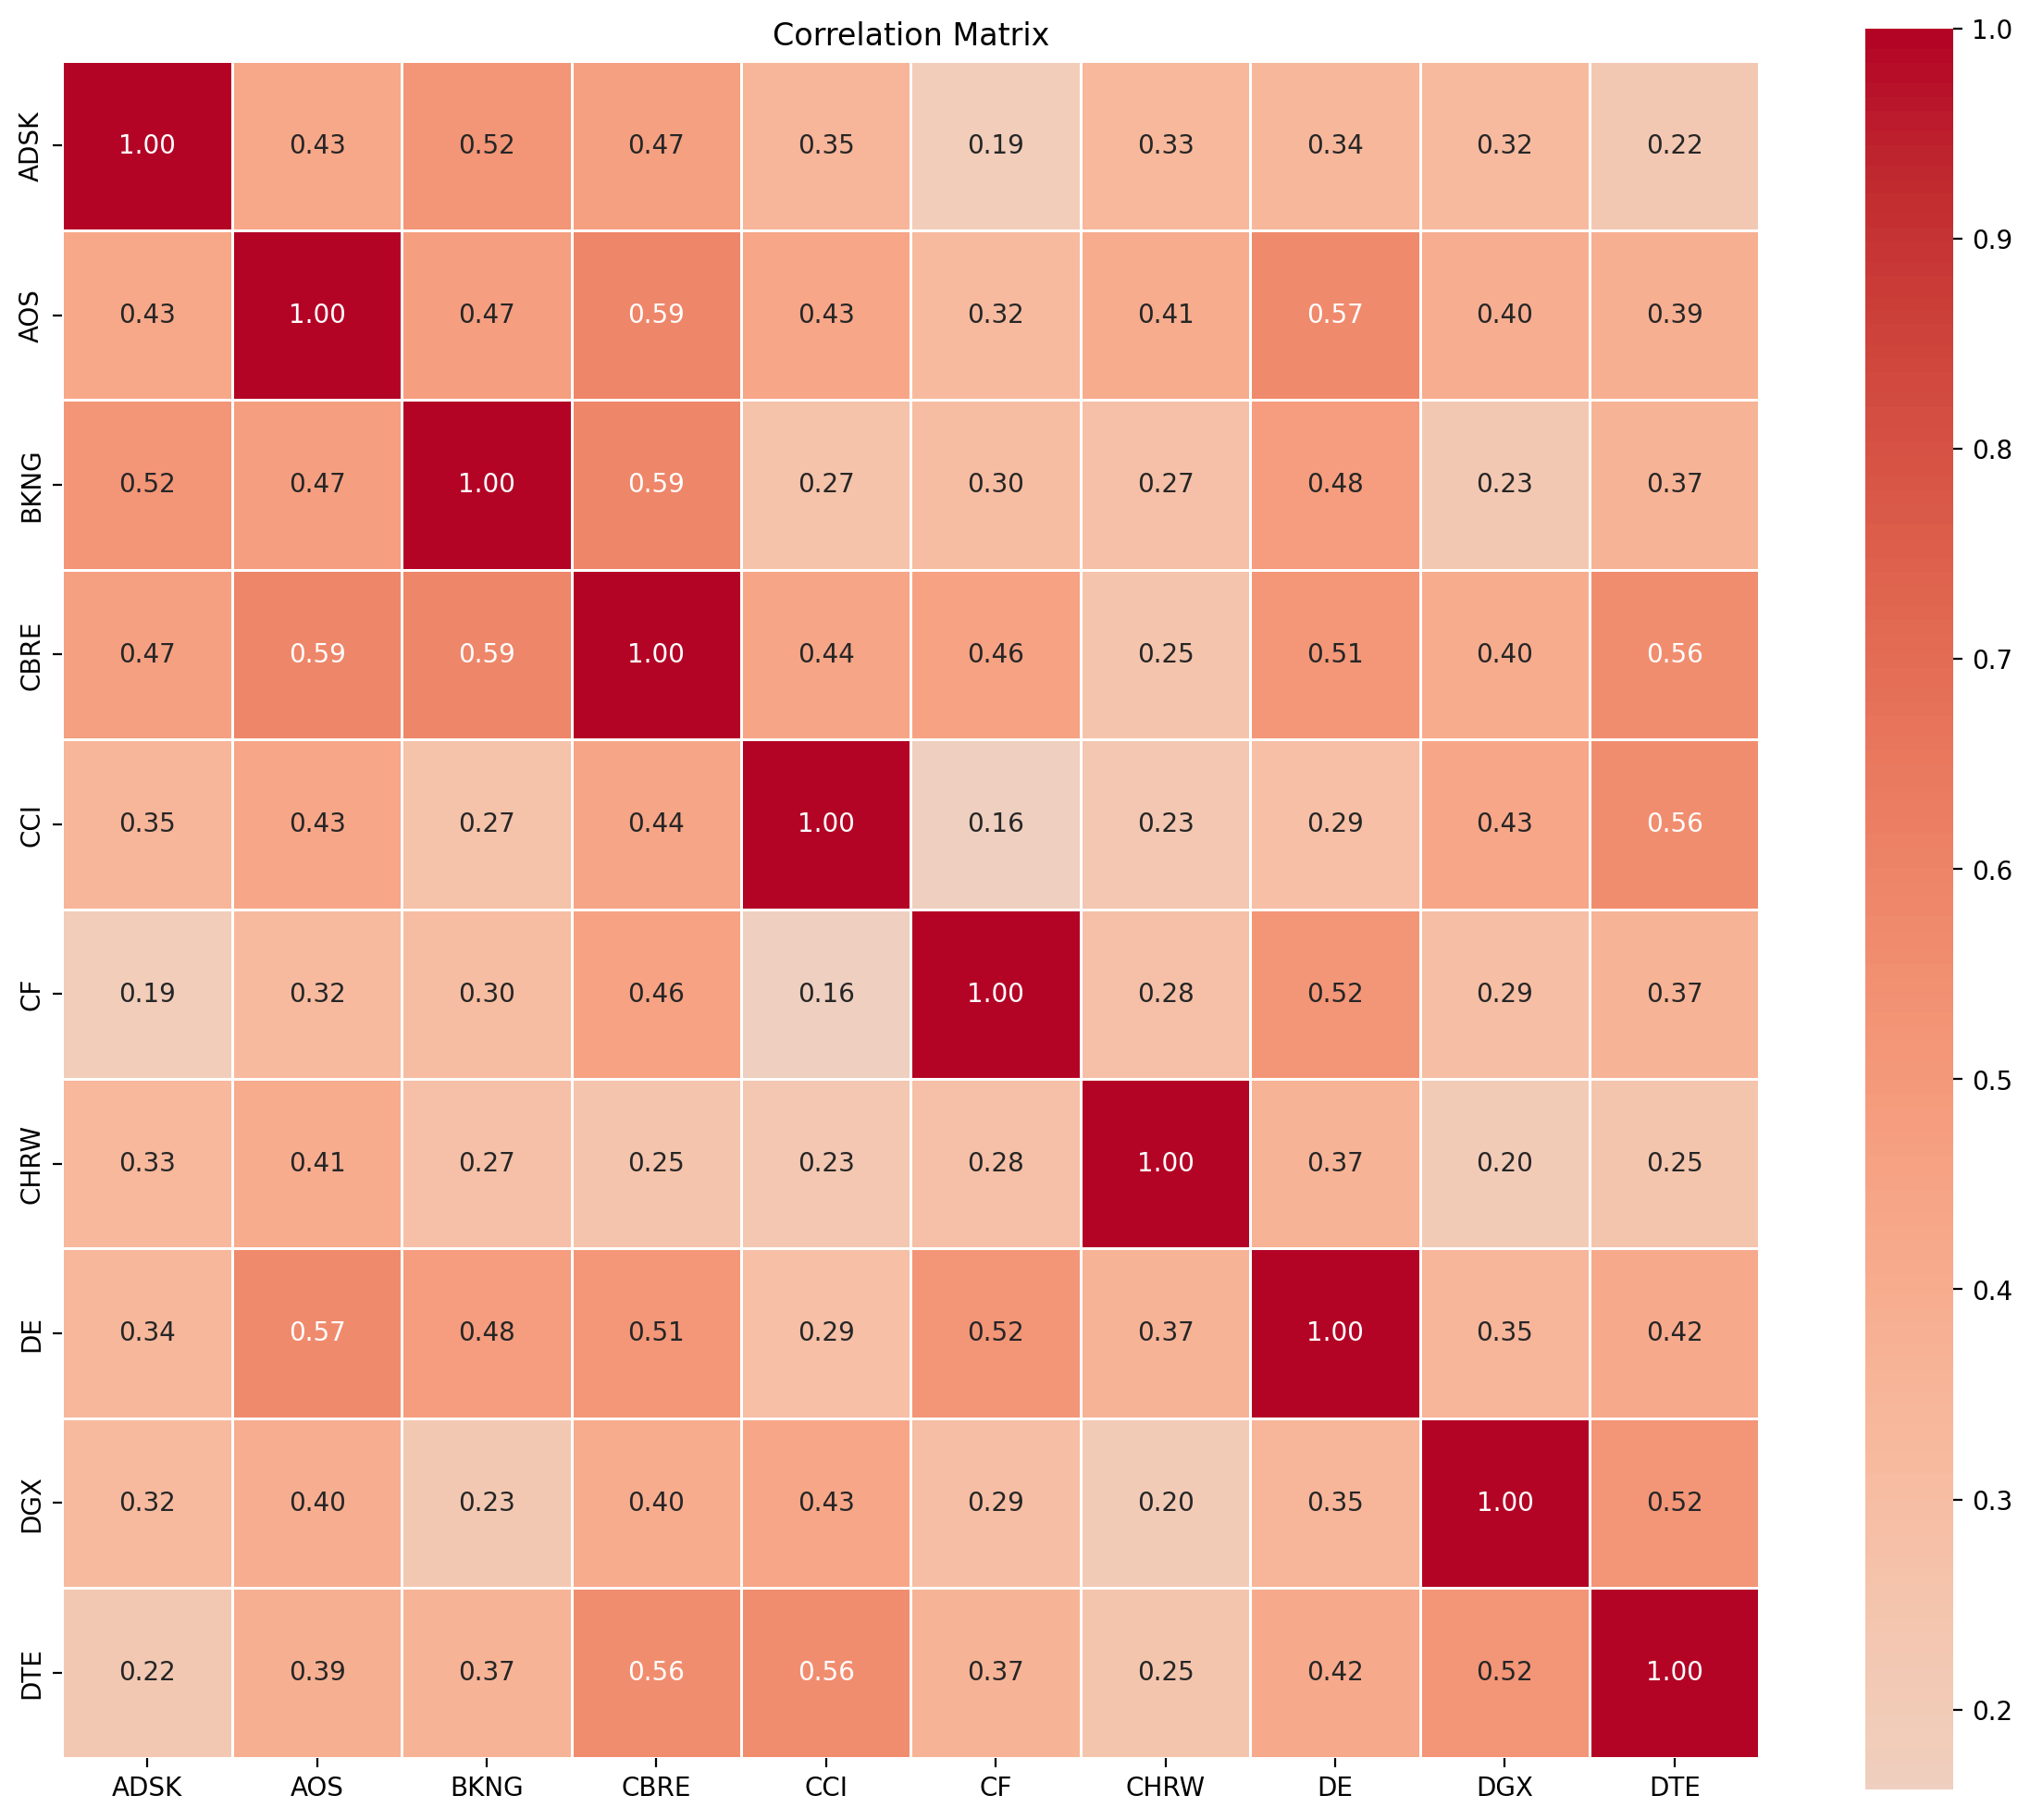


Top 10 stocks average correlation with all stocks:
CBRE    0.528029
AOS     0.500206
DE      0.484182
DTE     0.465039
BKNG    0.449945
ADSK    0.416337
CCI     0.415916
DGX     0.414031
CF      0.388267
CHRW    0.358498
dtype: float64

First 10 stocks average correlation with all stocks: 0.44204507630379936
All stocks average correlation with all stocks: 0.3951569464816432


In [131]:
first10 = sample_18Feb_24Dec.columns[:10]
first10_rets = sample_18Feb_24Dec[first10]
Plot_CorrHeatmap(first10_rets)
first10avgcorr = first10_rets.corr().sum().sort_values(ascending = False) / 10
allavgcorr = sample_18Feb_24Dec.corr().sum().sort_values(ascending = False) / len(sample_18Feb_24Dec.columns)
print("\nTop 10 stocks average correlation with all stocks:")
print(first10avgcorr)
print("\nFirst 10 stocks average correlation with all stocks:", first10avgcorr.mean())
print("All stocks average correlation with all stocks:", allavgcorr.mean())

1. These 10 stocks (0.442) have higher than sample average correlation (0.395)
2. `CHRW` offers the best diversification benefits

## 2. In-Sample Tangency (excess returns)

#### Note
Consider `in-sample` to be all the data through the end of `2024`.

In [132]:
inSample = rets.loc[:"2024-12-31"]

#### 2.1. Construct the tangency portfolio

Using just the in-sample data (through `2024`), calculate the tangency portfolio weights, assuming we have excess returns (existence of a risk-free rate.)
   * Display the ten largest portfolio weights.
   * Plot the Sharpe ratios against the portfolio weights. 

In [133]:
tangency_weights = Calc_TangencyWeights(inSample, annualizedFactor = 52)
mean, std, sharpe = Calc_MeanStdSharpe_Stock(inSample, annualized_factor = 52)
results = pd.DataFrame({
    "Weights": tangency_weights,
    "Sharpe": sharpe,
}, index = inSample.columns)
results_top10 = results.sort_values(by = "Weights", ascending = False)[:10]
results_top10

,Weights,Sharpe
DTE,0.452431,0.484716
WM,0.364931,0.929781
GOOGL,0.205688,0.854801
TTWO,0.198862,0.785463
DE,0.191454,0.725710
WMT,0.185139,0.773420
MRK,0.168538,0.541529
CBRE,0.167008,0.573396
PG,0.087959,0.611891
INTU,0.084542,0.843681


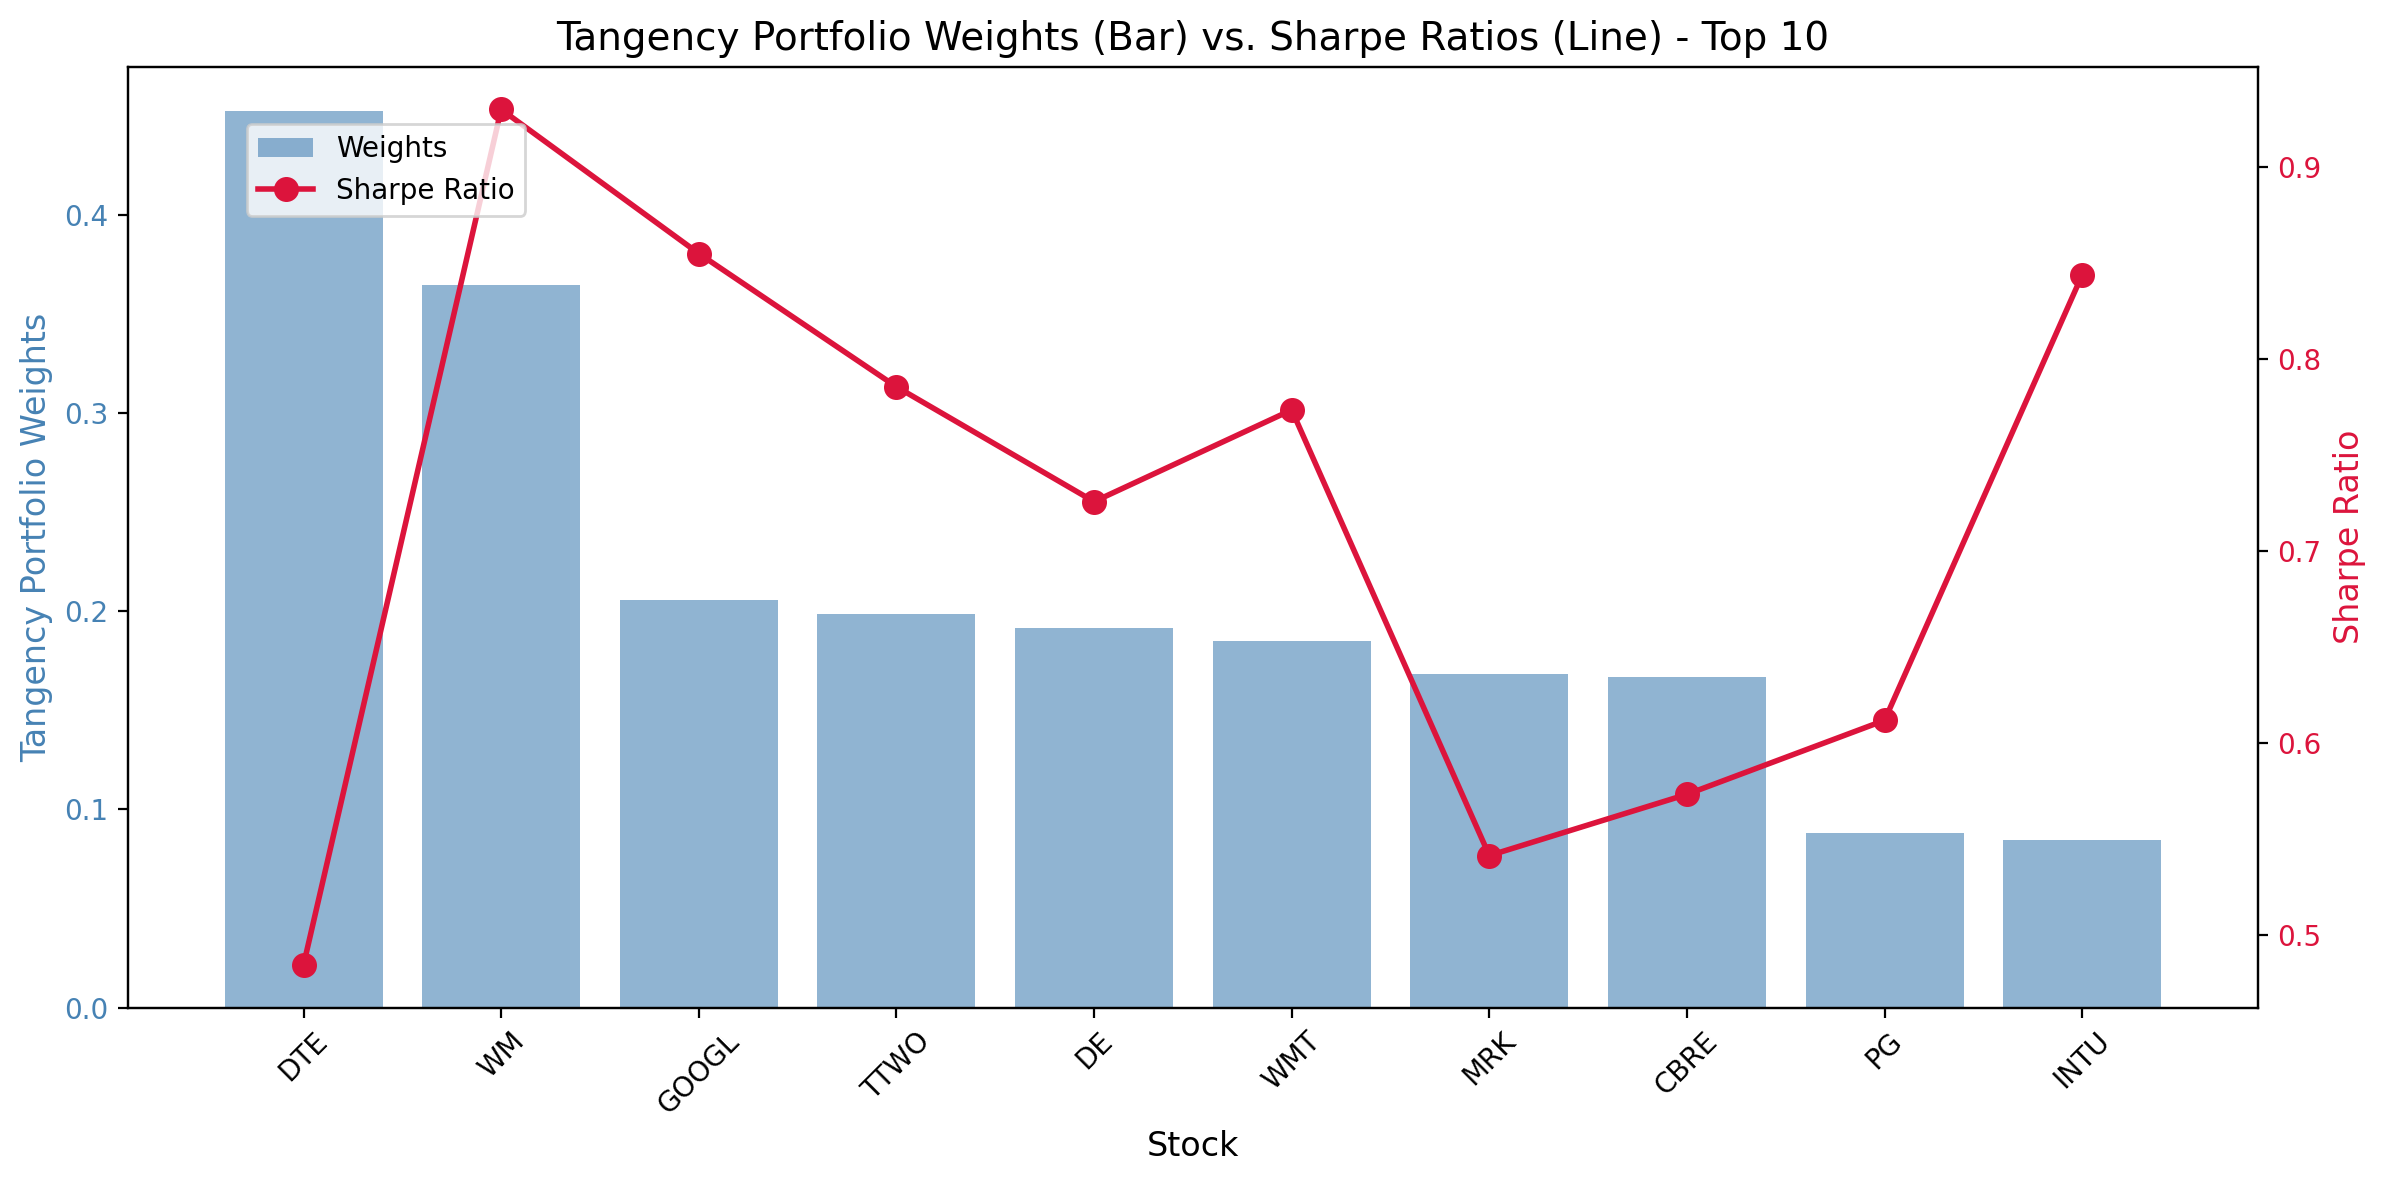

In [134]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for weights
ax1.bar(results_top10.index, results_top10['Weights'], alpha=0.6, color='steelblue', label='Weights')
ax1.set_xlabel('Stock', fontsize=12)
ax1.set_ylabel('Tangency Portfolio Weights', fontsize=12, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.tick_params(axis='x', rotation=45)

# Line plot for Sharpe ratios on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(results_top10.index, results_top10['Sharpe'], color='crimson', marker='o', linewidth=2, markersize=8, label='Sharpe Ratio')
ax2.set_ylabel('Sharpe Ratio', fontsize=12, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

plt.title('Tangency Portfolio Weights (Bar) vs. Sharpe Ratios (Line) - Top 10', fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()

#### 2.2.

Compare the relationship between tangency portfolio weights and individual sharpe ratios.

- `DTE` has the lowest sharpe but the highest weights
- While `WM` has the highest sharpe with the second highest weights

#### 2.3. Performance of the Tangency

Continue with the in-sample tangency portfolio constructed above, and analyze how it performs in-sample (through `2024`.)

   Report the (annualized)
   * mean
   * volatility
   * Sharpe ratio
   * skewness (not annualized)
   
   Plot the cumulative return of the tangency portfolio over the sample period.

Tangency Portfolio - Mean: 0.2993, Std: 0.1811, Sharpe: 1.6533, Skew: -0.0830


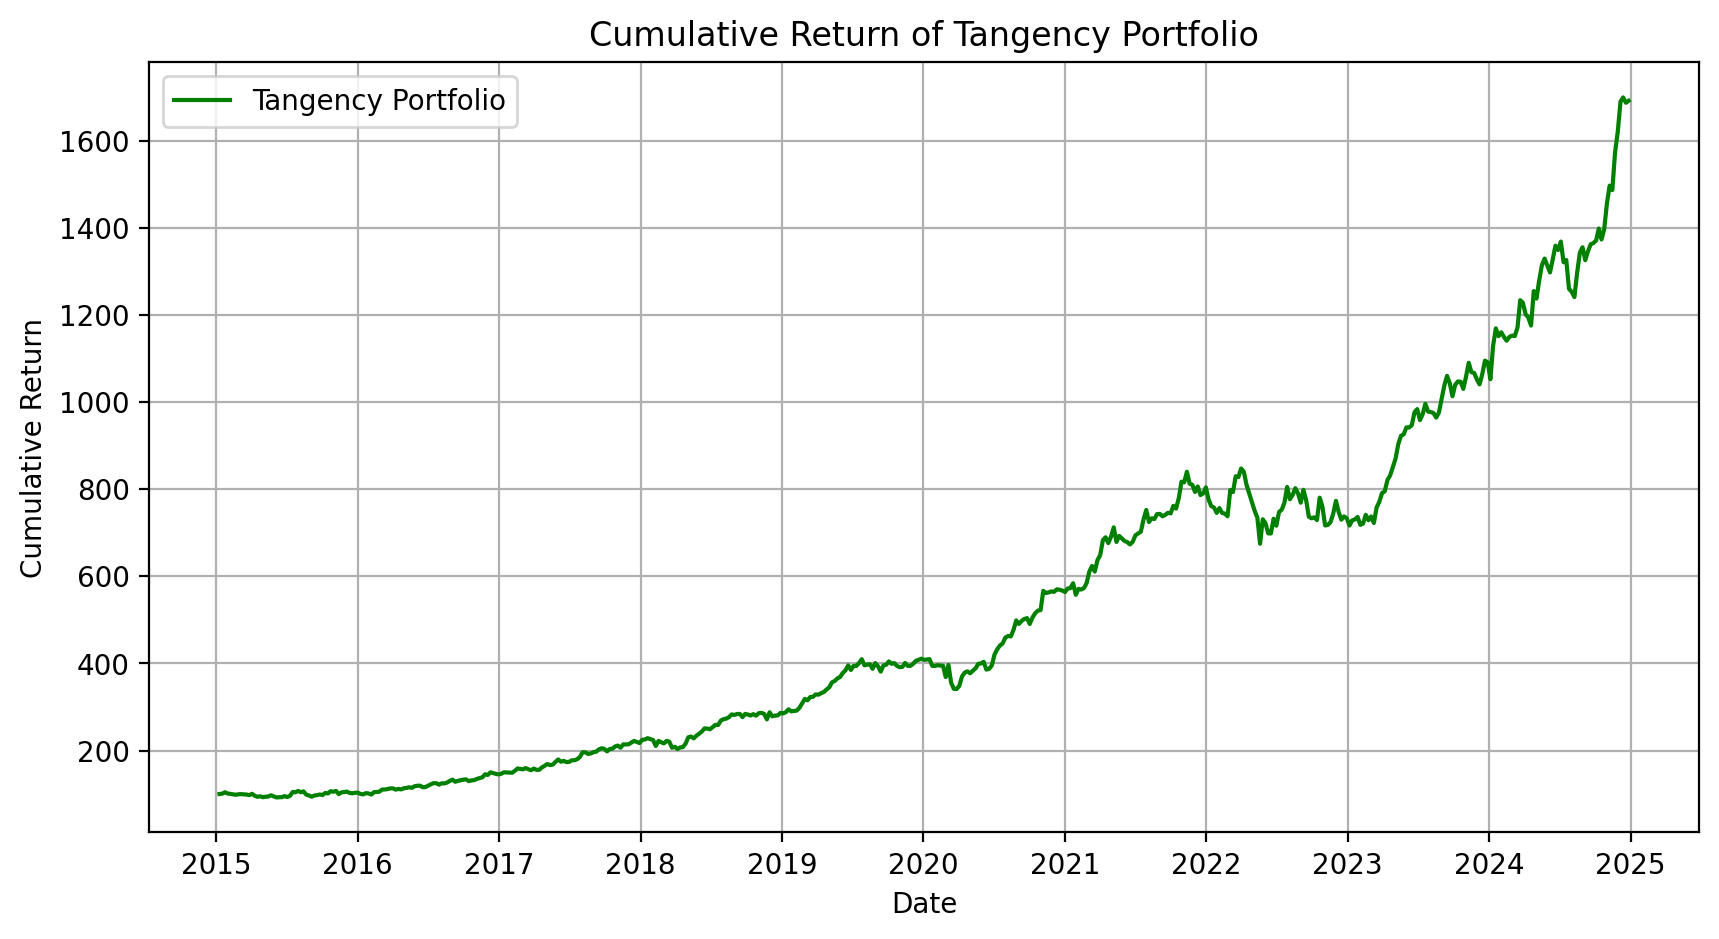

In [135]:
mean, std, sharpe = Calc_MeanStdSharpe_Portfolio(inSample, tangency_weights, annualizedFactor = 52)
portfolioReturns = inSample @ tangency_weights
skew = portfolioReturns.skew()
print(f"Tangency Portfolio - Mean: {mean:.4f}, Std: {std:.4f}, Sharpe: {sharpe:.4f}, Skew: {skew:.4f}")

cumReturns = Calc_CumulativeReturn(portfolioReturns)
plt.figure(figsize=(10, 5))
plt.plot(cumReturns.index, cumReturns.values, label='Tangency Portfolio', color='green')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of Tangency Portfolio')
plt.legend()
plt.grid()
plt.show()

## 3. Hedging the Tangency Portfolio

Continue with the in-sample (through 2024) tangency returns calculated in the previous problem.

#### 3.1.

Compute portfolio returns and regress on `SPY` to get $\hat{\beta}$. 

Include an intercept in the regression.

Report $\hat{\beta}$.

In [136]:
y = spy["SPY"].loc[:"2024-12-31"]
x = portfolioReturns
Beta_portfolio, Treynor_Ratio_portfolio, Information_Ratio_portfolio, Rsquared_portfolio, Tracking_Error_portfolio, Model_portfolio = Calc_Beta_TreynorRatio_InfoRatio_RSquared_TrackingError(y, x, annualized_factor = 52)
print(f"Tangency Portfolio - Beta: {Beta_portfolio:.4f}")

Tangency Portfolio - Beta: 0.5194


#### 3.2. 

Calculate the returns to the hedged position.

   Report the (annualized)
   * mean
   * volatility
   * Sharpe ratio
   * skewness (not annualized)
   

In [137]:
hedgedReturns = portfolioReturns - Beta_portfolio * y
mean, std, sharpe = Calc_MeanStdSharpe_Stock(hedgedReturns, annualized_factor = 52)
skew = hedgedReturns.skew()
print(f"Hedged Tangency Portfolio - Mean: {mean:.4f}, Std: {std:.4f}, Sharpe: {sharpe:.4f}, Skew: {skew:.4f}")

Hedged Tangency Portfolio - Mean: 0.2277, Std: 0.1506, Sharpe: 1.5120, Skew: 0.1608


## 4. Out-of-Sample

#### 4.1. Tangency Portfolio Performance: Out-of-Sample (OOS)

Use the weights of the tangency portfolio calculated above.

Compute the out-of-sample returns (`2025`), and just for this OOS portion, report the (annualized)
* mean
* volatility
* Sharpe ratio
* skewness (not annualized)

In [138]:
sample_oos = rets.loc["2025-01-01":]
sample_oos.head()

,ADSK,AOS,BKNG,CBRE,CCI,CF,CHRW,DE,DGX,DTE,...,MRK,MTD,PG,PNR,SBAC,STE,TTWO,VTRS,WM,WMT
date,,,,,,,,,,,,,,,,,,,,,
2025-01-03,-0.011862,0.002485,-0.026510,0.006660,-0.006295,0.044366,0.005294,-0.014470,-0.004652,0.001895,...,-0.005617,0.003281,-0.025954,-0.000791,-0.006889,-0.018560,0.012444,-0.016024,-0.011617,-0.009601
2025-01-10,-0.030946,-0.014869,-0.033504,-0.059544,-0.062895,0.002824,-0.025661,-0.032329,-0.000855,-0.021056,...,0.001109,-0.022039,-0.039787,-0.040470,-0.044794,0.007937,-0.053722,-0.049673,0.027771,0.024455
2025-01-17,0.022775,0.062591,0.039508,0.107059,0.079805,0.092948,0.017886,0.114717,0.000987,0.038985,...,-0.013400,0.069728,0.016208,0.062390,0.056284,0.018859,0.043671,-0.031710,0.021520,-0.011398
2025-01-24,0.032184,-0.017267,-0.032863,0.030823,-0.028223,-0.091846,0.044217,0.051225,0.026984,-0.036875,...,-0.024203,0.027535,0.024765,0.002304,-0.033299,0.035254,-0.004935,-0.008844,-0.010769,0.030672
2025-01-31,0.034937,-0.041496,-0.005736,0.025579,0.008928,0.046651,-0.080159,-0.004616,0.050361,0.006549,...,0.034223,0.025047,0.011394,0.006504,0.003710,0.016773,0.000108,0.007144,0.051712,0.035880


In [139]:
mean, std, sharpe = Calc_MeanStdSharpe_Portfolio(sample_oos, tangency_weights, annualizedFactor = 52)
portfolioReturns_oos = sample_oos @ tangency_weights
skew = portfolioReturns_oos.skew()
print(f"OOS Tangency Portfolio - Mean: {mean:.4f}, Std: {std:.4f}, Sharpe: {sharpe:.4f}, Skew: {skew:.4f}")

OOS Tangency Portfolio - Mean: 0.4346, Std: 0.2169, Sharpe: 2.0034, Skew: -0.2853


#### 4.2. Cumulative performance

* Include the OOS performance in the cumulative return plot (in addition to the in-sample performance).

Show the plot.

In [140]:
inSample_CumReturns.iloc[-1]

np.float64(1691.4287292163137)

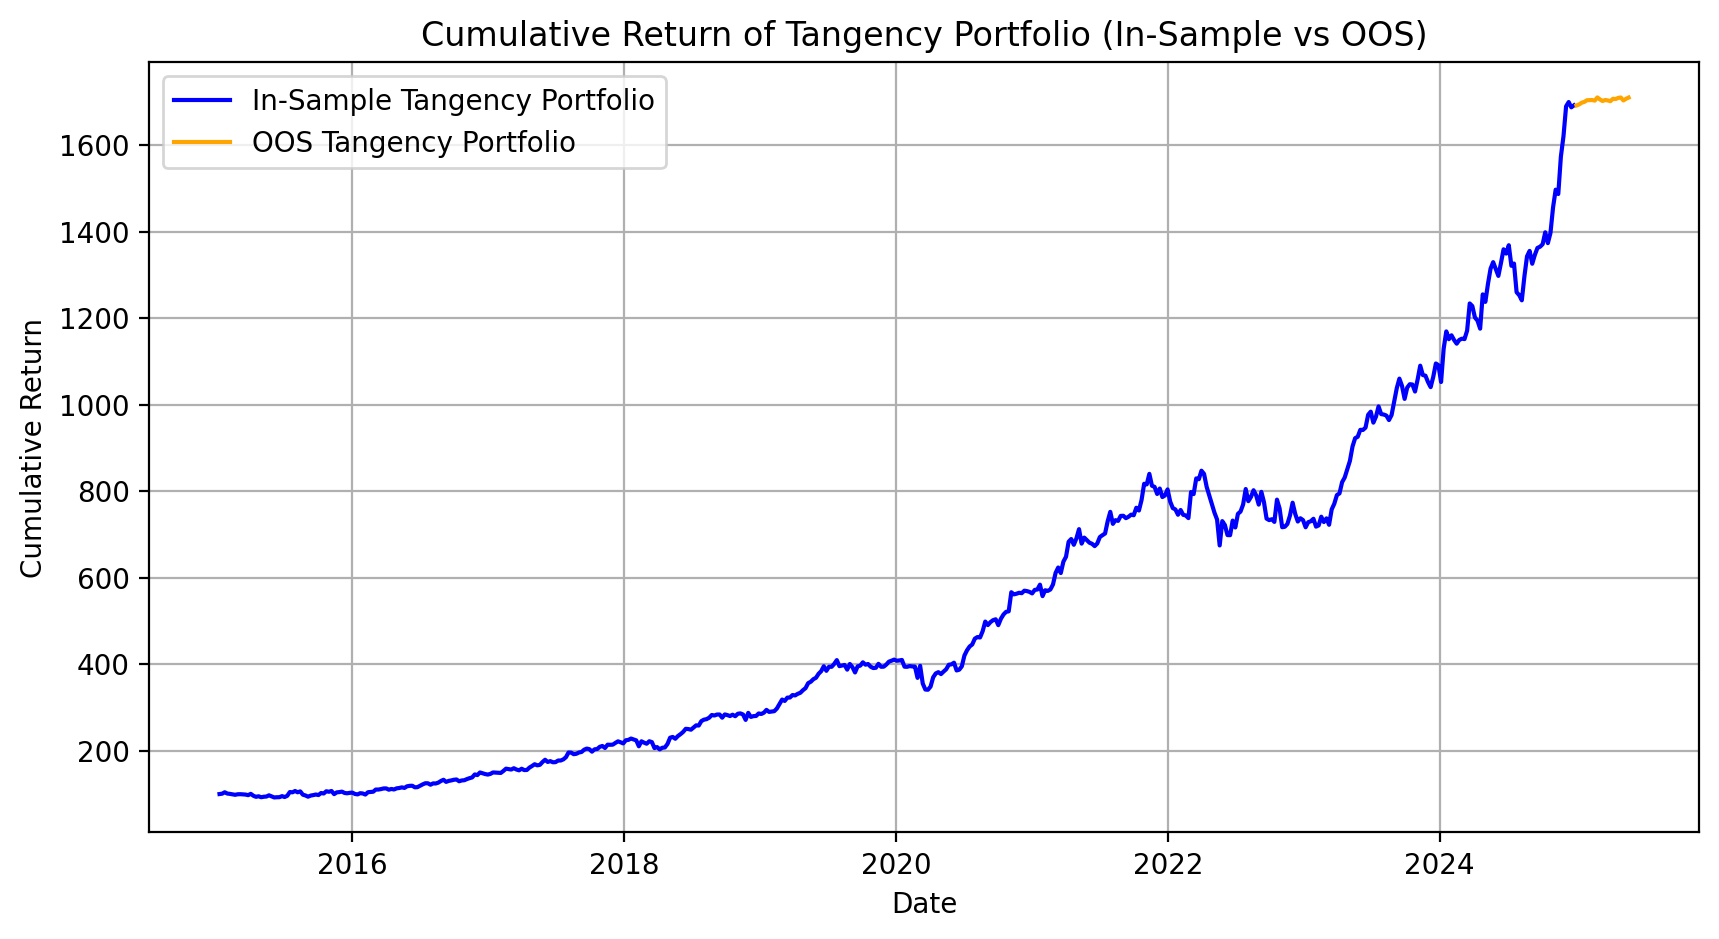

In [141]:
inSample_CumReturns = Calc_CumulativeReturn(portfolioReturns)
oos_CumReturns = Calc_CumulativeReturn(portfolioReturns_oos) + inSample_CumReturns.iloc[-1] - 100

plt.figure(figsize=(10, 5))
plt.plot(inSample_CumReturns.index, inSample_CumReturns, label='In-Sample Tangency Portfolio', color='blue')
plt.plot(oos_CumReturns.index, oos_CumReturns, label='OOS Tangency Portfolio', color='orange')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of Tangency Portfolio (In-Sample vs OOS)')
plt.legend()
plt.grid()
plt.show()

## 5. Optimizing Hedged Returns

#### 5.1. Construct Market-Hedged Returns

Active managers might optimize their portfolios using market-hedged returns to focus on alpha generation (maximize portion of returns orthogonal to the market). Market-hedged returns are the residuals from regressing each stock’s excess return on the market’s excess return (e.g., `SPY`), effectively removing market beta to isolate stock-specific (idiosyncratic) performance.

* Regress each stock's excess return on the SPY index (quoted in excess return) over the sample period. 
* Include an intercept.
* Report your betas.

In [142]:
spy_inSample = spy["SPY"].loc[:"2024-12-31"]
spy_oos = spy["SPY"].loc["2025-01-01":]
betas = list()
alpha = list()

for t in inSample.columns:
    y = spy_inSample
    x = inSample[t]
    Beta_t, _, _, _, _, model = Calc_Beta_TreynorRatio_InfoRatio_RSquared_TrackingError(y, x, annualized_factor = 52)
    betas.append(Beta_t)
    alpha.append(model.params['const'])
betas_df = pd.DataFrame({
    "Beta": betas,
    "Alpha": alpha
}, index = inSample.columns)
betas_df.sort_values(by = "Beta", ascending = False)["Beta"].to_frame()

,Beta
PG,0.522287
GD,0.511908
WM,0.507116
INTU,0.429579
MTD,0.410415
STE,0.408380
DTE,0.406443
PNR,0.403996
GOOGL,0.394376
AOS,0.391725


#### 5.2. The residuals

Save the residuals from each regression as the market-hedged returns. 

Report the `.tail()` (last 5 observations) of the residual dataframe.

In [143]:
betas_df.sort_values(by = "Alpha", ascending = False)["Alpha"].to_frame().tail(5)

,Alpha
MTD,0.001251
DE,0.001211
WM,0.000946
GOOGL,0.000858
INTU,0.000623


#### 5.3 Diversification Benefits of Market-Hedged Returns

Display the covariance matrix of the market-hedged returns for the first ten stocks.


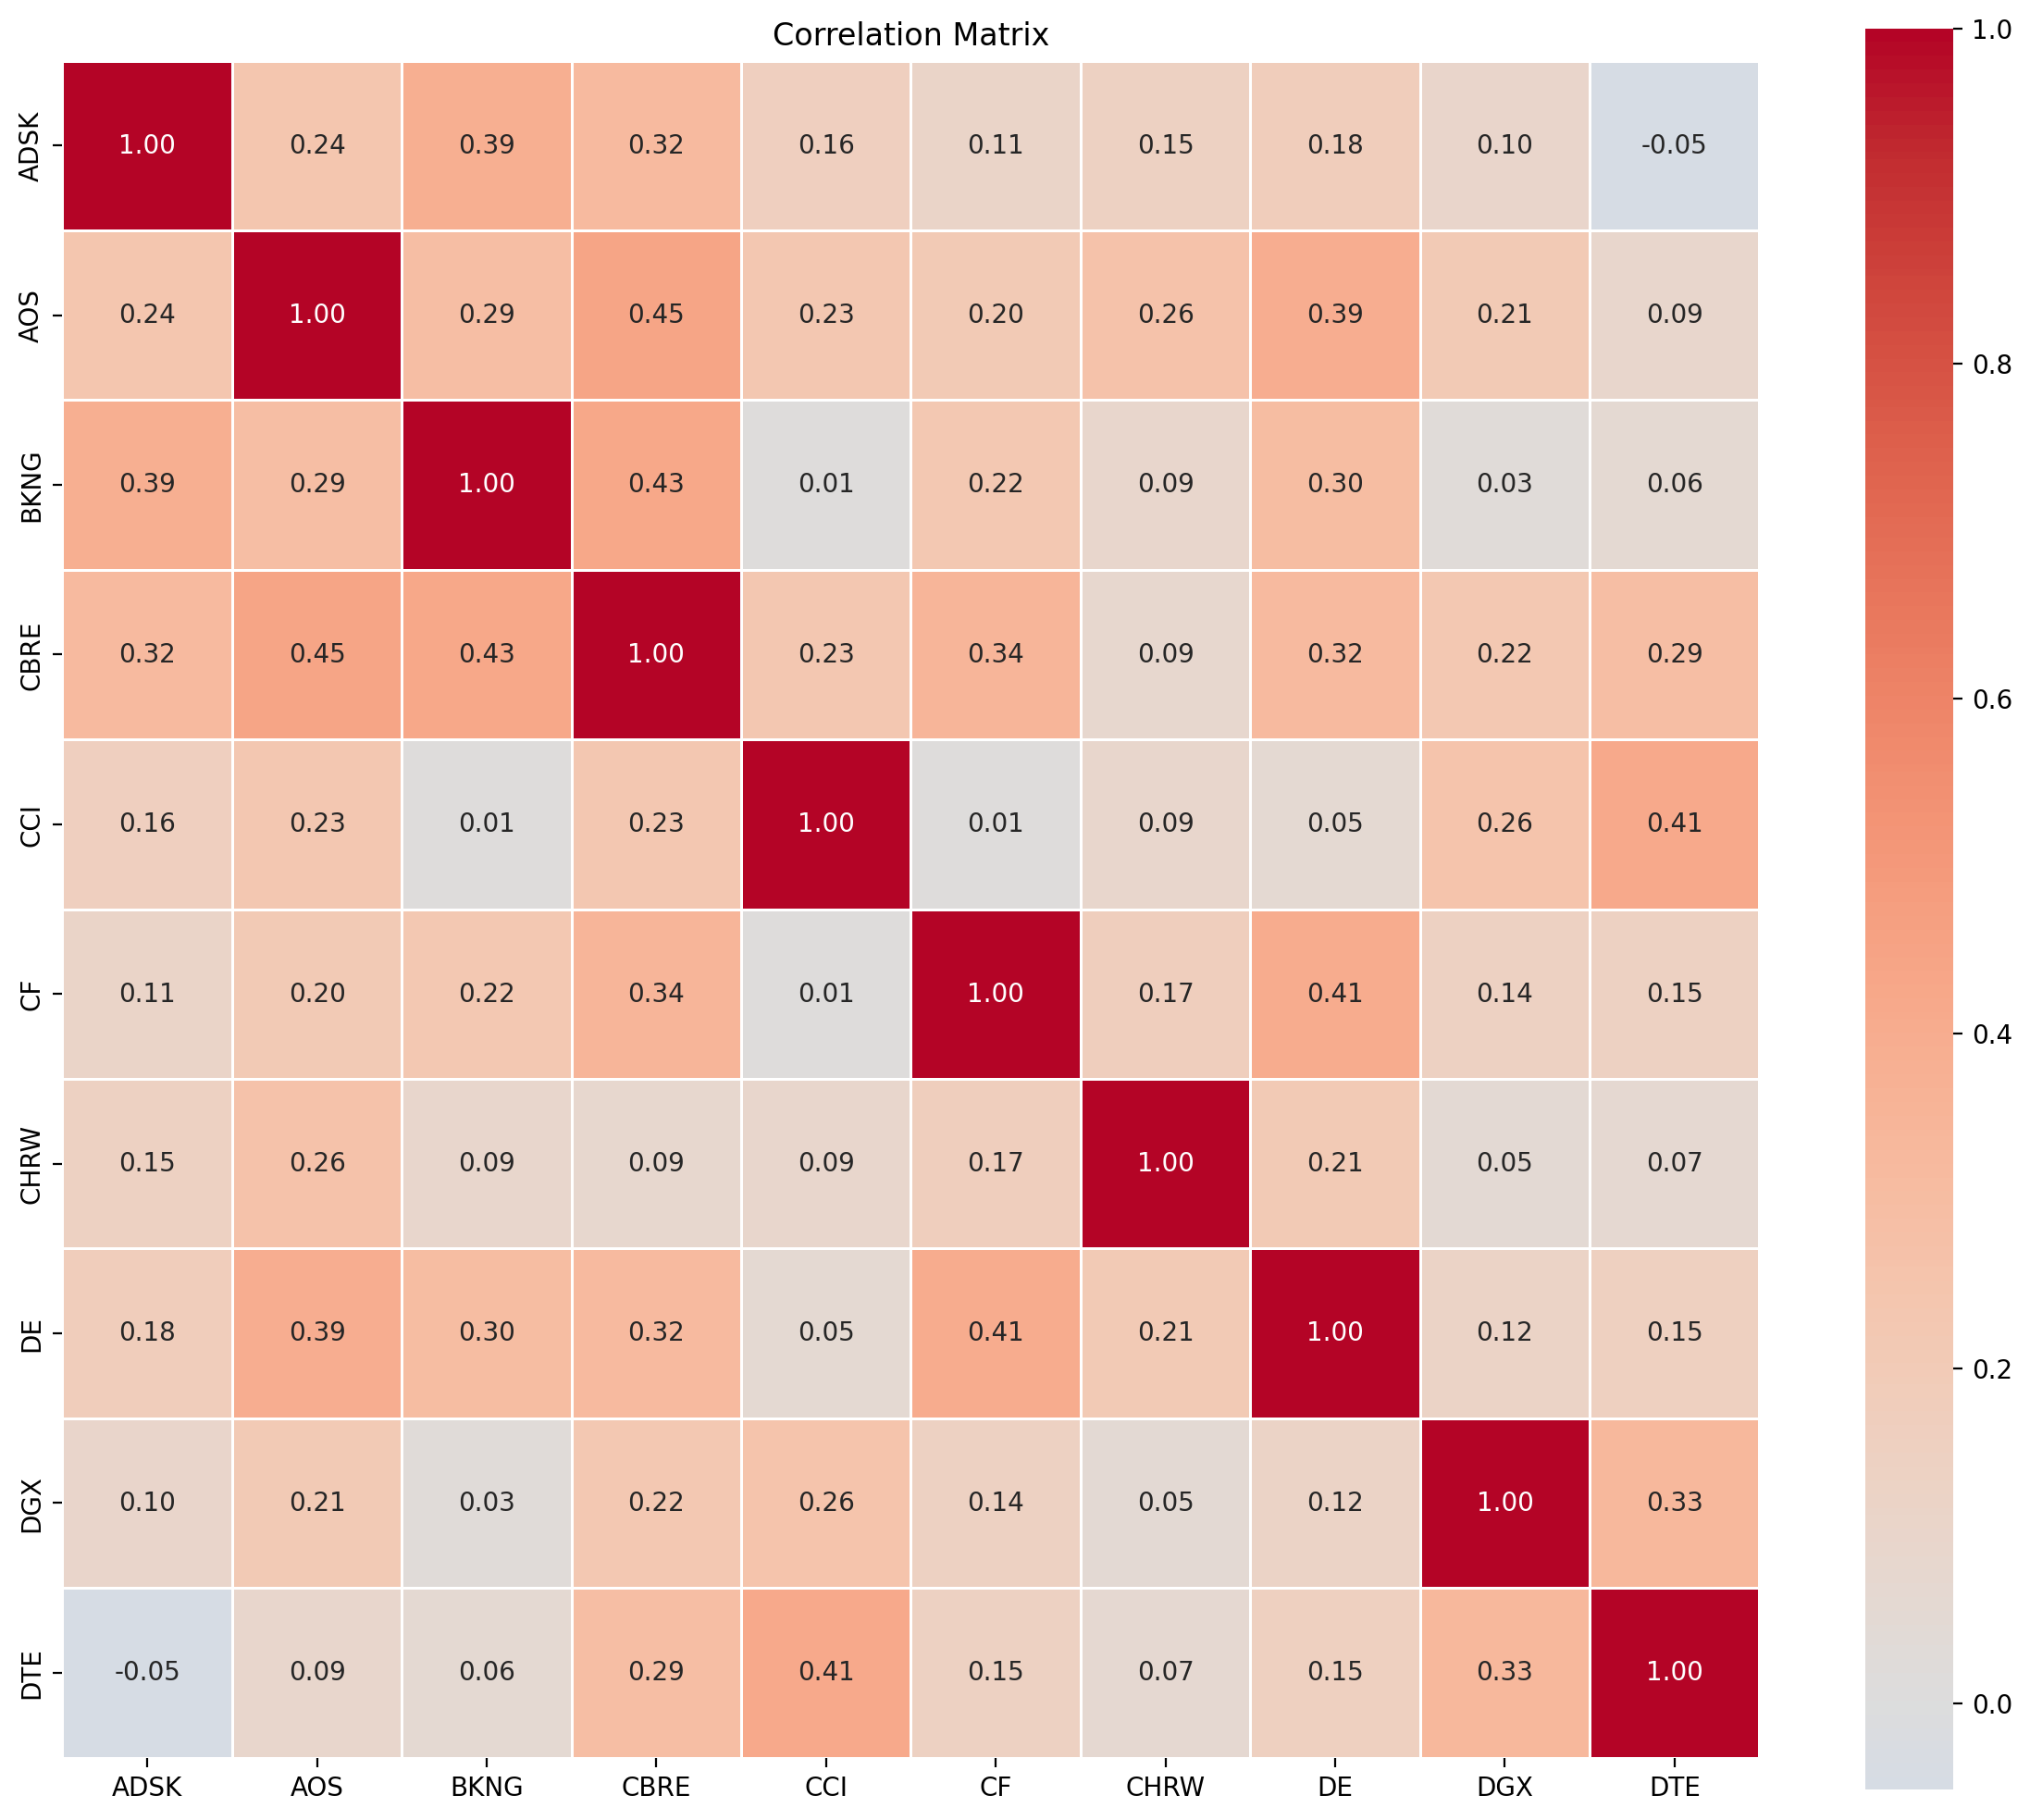

In [144]:
first10_MarketHedgedReturns = list()
for t in first10:
    hedgedReturns_t = inSample[t] - betas_df.loc[t, "Beta"] * spy_inSample
    first10_MarketHedgedReturns.append(hedgedReturns_t)
first10_MarketHedgedReturns_df = pd.DataFrame(first10_MarketHedgedReturns).T
first10_MarketHedgedReturns_df.columns = first10
Plot_CorrHeatmap(first10_MarketHedgedReturns_df)

#### 5.4. Portfolio Optimization with Market-Hedged Returns

Construct the tangency portfolio using the alphas (intercept from previous regression) as expected returns and the covariance matrix of the market-hedged returns. Display the portfolio weights.

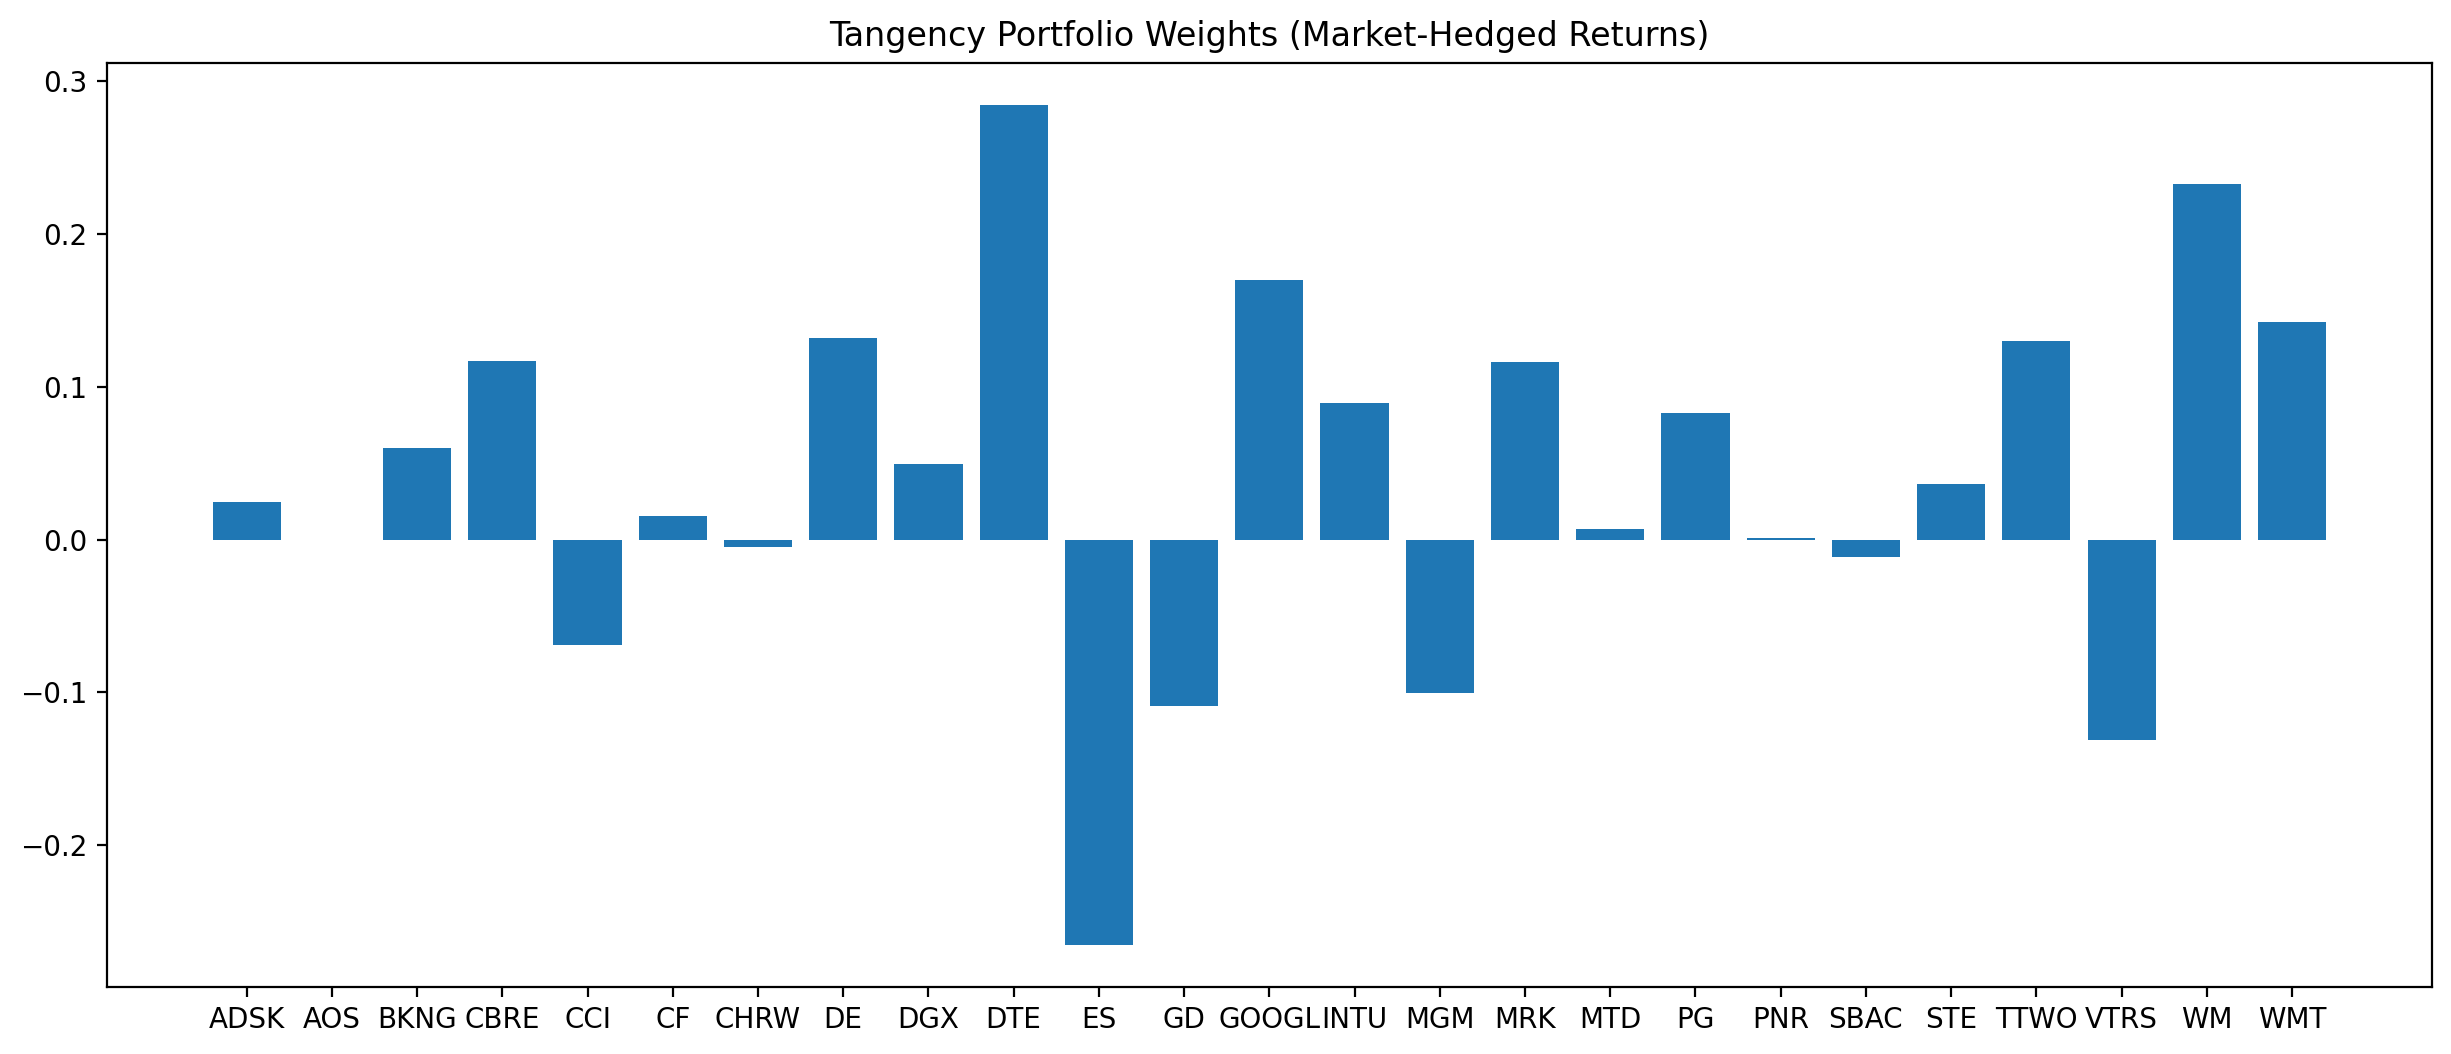

In [145]:
marketHedgedReturns = list()

for t in inSample.columns:
    hedgedReturns_t = inSample[t] - betas_df.loc[t, "Beta"] * spy_inSample
    marketHedgedReturns.append(hedgedReturns_t)

marketHedgedReturns_df = pd.DataFrame(marketHedgedReturns).T
marketHedgedReturns_df.columns = inSample.columns
tangencyWeights = Calc_TangencyWeights(marketHedgedReturns_df, annualizedFactor = 52)
weights = pd.DataFrame({
    "Weights": tangencyWeights
}, index = marketHedgedReturns_df.columns)
plt.figure(figsize=(15, 6))
plt.title("Tangency Portfolio Weights (Market-Hedged Returns)")
plt.bar(weights.index, weights["Weights"])
plt.show()

In [146]:
weights.T

,ADSK,AOS,BKNG,CBRE,CCI,CF,CHRW,DE,DGX,DTE,...,MRK,MTD,PG,PNR,SBAC,STE,TTWO,VTRS,WM,WMT
Weights,0.024633,-0.000301,0.059742,0.116702,-0.068907,0.015394,-0.004638,0.131747,0.049188,0.28477,...,0.11609,0.006663,0.0828,0.001343,-0.0114,0.03663,0.129972,-0.130975,0.232894,0.142732


#### 5.5. Performance of the Tangency of the Hedged

Calculate the returns to the portfolio with weights from the previous question (just in-sample).

   Report the (annualized)
   * mean
   * volatility
   * Sharpe ratio
   * skewness (not annualized)

In [147]:
mean, std, sharpe = Calc_MeanStdSharpe_Portfolio(marketHedgedReturns_df, tangencyWeights, annualizedFactor = 52)
returns = marketHedgedReturns_df @ tangencyWeights
skew = returns.skew()
print(f"Market-Hedged Tangency Portfolio - Mean: {mean:.4f}, Std: {std:.4f}, Sharpe: {sharpe:.4f}, Skew: {skew:.4f}")

Market-Hedged Tangency Portfolio - Mean: 0.1891, Std: 0.1116, Sharpe: 1.6938, Skew: 0.0021


***

# 2. Managing Risk

In [148]:
DATAFILE = 'data/midterm_1_fund_returns.xlsx'
df = pd.read_excel(DATAFILE, sheet_name='fund returns').set_index('date')
df

,fund
date,
2015-01-09,0.003444
2015-01-16,-0.000959
2015-01-23,0.004491
2015-01-30,0.010560
2015-02-06,-0.001624
...,...
2024-11-29,0.013893
2024-12-06,-0.027113
2024-12-13,0.002755


#### 1. Calculating Volatility
Given the return data provided, calculate the annual volatility grouped by year. Annualize this volatility. That is, your answer should be a DataFrame with 10 rows (one for each year from 2015 to 2024) and a single column representing the annualized volatility for that year.

What do you notice about the volatility across different years?

In [149]:
annual_groups = df.groupby(df.index.year)['fund']
annual_volatility = annual_groups.std() * np.sqrt(52)
result = pd.DataFrame({
    "Annual Volatility": annual_volatility
}, index = annual_volatility.index)
result

,Annual Volatility
date,
2015,0.046374
2016,0.175849
2017,0.048981
2018,0.184665
2019,0.056721
2020,0.196581
2021,0.039123
2022,0.206772
2023,0.051441


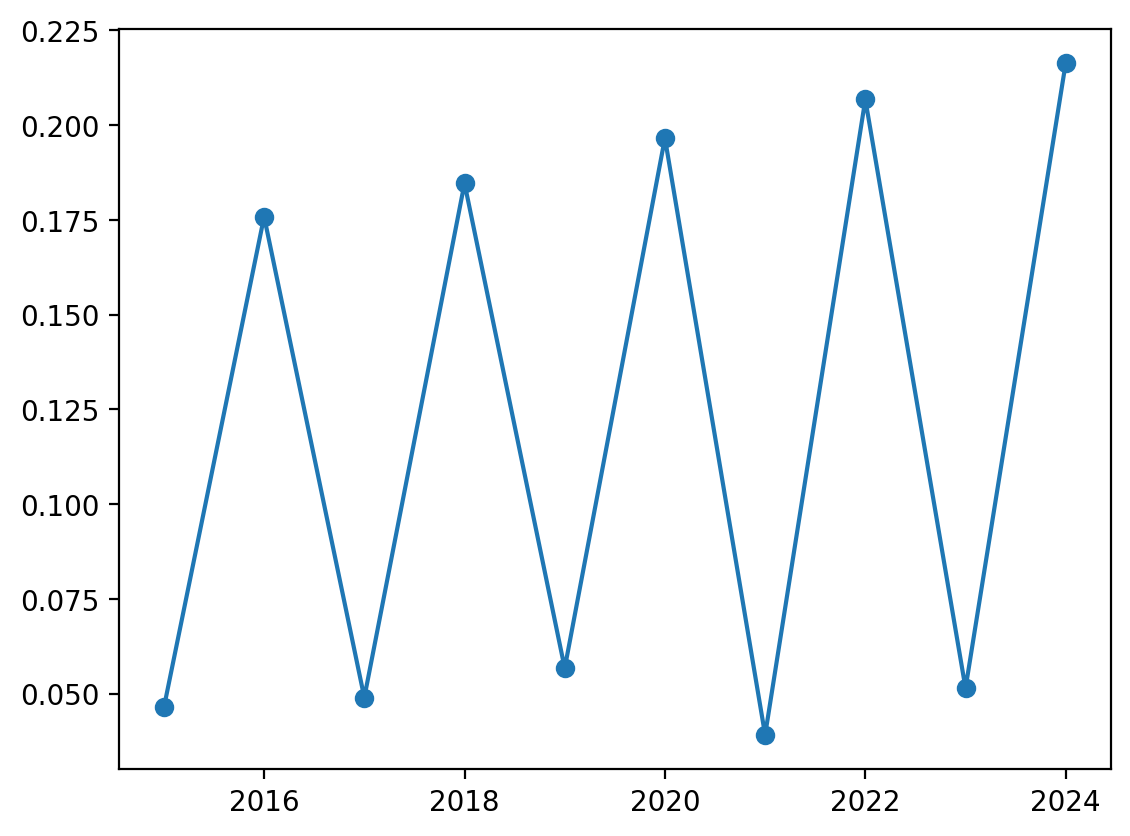

In [150]:
plt.plot(annual_volatility.index, annual_volatility.values, marker='o')
plt.show()

- Volatility swings sharply year to year—low in 2015, 2017, 2019, 2021, 2023, but spiking in alternating years, peaking in 2024—suggesting alternating calm and stress regimes rather than a stable trend.

#### 2. Volatility Estimates

Using the return data, compute the annualized volatility estimate as of the last data point using the following methods:
- EWMA volatility with a half-life of 26 weeks.
- Rolling window volatility with a window size of 52 weeks.

**Note:** do not specify a "min_periods" argument anywhere.

In [151]:
ewma_vol = df['fund'].ewm(halflife=26, adjust=False).std().iloc[-1] * np.sqrt(52)

rolling_vol = df['fund'].rolling(window=52).std().iloc[-1] * np.sqrt(52)

print(f"EWMA Volatility (annualized): {ewma_vol:.4f}")
print(f"Rolling Window Volatility (annualized): {rolling_vol:.4f}")

EWMA Volatility (annualized): 0.1797
Rolling Window Volatility (annualized): 0.2164


#### 3. Dynamic VaR estimates

Using the return data, compute the 1-week 1% VaR as of the last data point in the series.

You should use two different volatility models to compute the VaR:
- EWMA volatility with a half-life of 26 weeks.
- Rolling-window volatility with a window of 52 weeks.
- Empirical (expanding) VaR.

In [152]:
from scipy.stats import norm

ewma_vol_weekly = df['fund'].ewm(halflife=26, adjust=False).std().iloc[-1]
var_ewma = -norm.ppf(0.01) * ewma_vol_weekly

rolling_vol_weekly = df['fund'].rolling(window=52).std().iloc[-1]
var_rolling = -norm.ppf(0.01) * rolling_vol_weekly

# 3. Empirical (expanding) VaR
var_empirical = -df['fund'].quantile(0.01)

print(f"VaR (1-week, 1%) - EWMA: {var_ewma:.4f}")
print(f"VaR (1-week, 1%) - Rolling: {var_rolling:.4f}")
print(f"VaR (1-week, 1%) - Empirical: {var_empirical:.4f}")

VaR (1-week, 1%) - EWMA: 0.0580
VaR (1-week, 1%) - Rolling: 0.0698
VaR (1-week, 1%) - Empirical: 0.0528


#### 4. Dynamic CVaR estimates

Repeat Question 3, but instead compute the 1-week 1% Conditional VaR (CVaR) as of the last data point in the series using the same three methods.

In [153]:
ewma_vol_weekly = df['fund'].ewm(halflife=26, adjust=False).std().iloc[-1]
cvar_ewma = ewma_vol_weekly * norm.pdf(norm.ppf(0.01)) / 0.01

rolling_vol_weekly = df['fund'].rolling(window=52).std().iloc[-1]
cvar_rolling = rolling_vol_weekly * norm.pdf(norm.ppf(0.01)) / 0.01

var_threshold = df['fund'].quantile(0.01)
cvar_empirical = -df['fund'][df['fund'] <= var_threshold].mean()

print(f"CVaR (1-week, 1%) - EWMA: {cvar_ewma:.4f}")
print(f"CVaR (1-week, 1%) - Rolling: {cvar_rolling:.4f}")
print(f"CVaR (1-week, 1%) - Empirical: {cvar_empirical:.4f}")

CVaR (1-week, 1%) - EWMA: 0.0664
CVaR (1-week, 1%) - Rolling: 0.0800
CVaR (1-week, 1%) - Empirical: 0.0658


#### 5. Year Choice

Suppose instead we were interested in our VaR estimates as of the end of 2023 (ie. use all data that is before 2024-01-01). Report your VaR (1-week, 1%) estimates using the same three methods as in Question 3, but now the last data point in 2023.

Hint: You can use `df.loc[:'2023']` to filter the DataFrame to only include data up to the end of 2023.

In [154]:
# Filter data up to end of 2023
df_2023 = df.loc[:'2023']

# 1. EWMA VaR
ewma_vol_weekly_2023 = df_2023['fund'].ewm(halflife=26, adjust=False).std().iloc[-1]
var_ewma_2023 = -norm.ppf(0.01) * ewma_vol_weekly_2023

# 2. Rolling Window VaR
rolling_vol_weekly_2023 = df_2023['fund'].rolling(window=52).std().iloc[-1]
var_rolling_2023 = -norm.ppf(0.01) * rolling_vol_weekly_2023

# 3. Empirical VaR
var_empirical_2023 = -df_2023['fund'].quantile(0.01)

print(f"VaR (1-week, 1%) as of end of 2023:")
print(f"  EWMA: {var_ewma_2023:.4f}")
print(f"  Rolling: {var_rolling_2023:.4f}")
print(f"  Empirical: {var_empirical_2023:.4f}")

VaR (1-week, 1%) as of end of 2023:
  EWMA: 0.0324
  Rolling: 0.0166
  Empirical: 0.0496


### 6. Compare

What do you notice about the VaR estimates compared to those from question `2.2`?